In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [12]:
data = pd.read_csv('C:\\Users\\sahil.rohra\\Documents\\Untitled Folder\\quality-report.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Visualising the Data

<AxesSubplot:xlabel='quality', ylabel='count'>

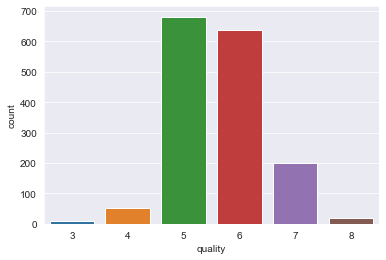

In [17]:
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
sns.countplot(x=data['quality'], data=data)

<AxesSubplot:>

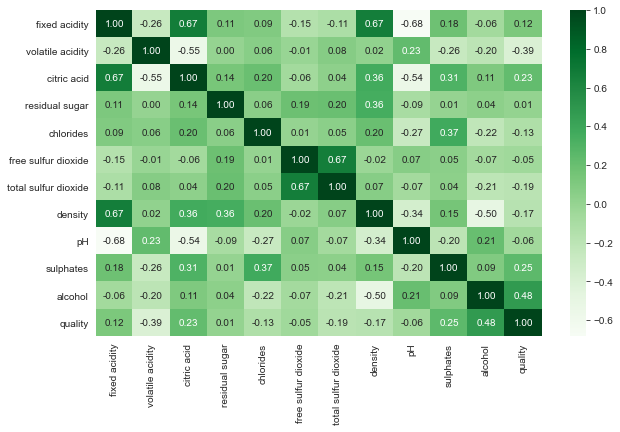

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="Greens", fmt=".2f")

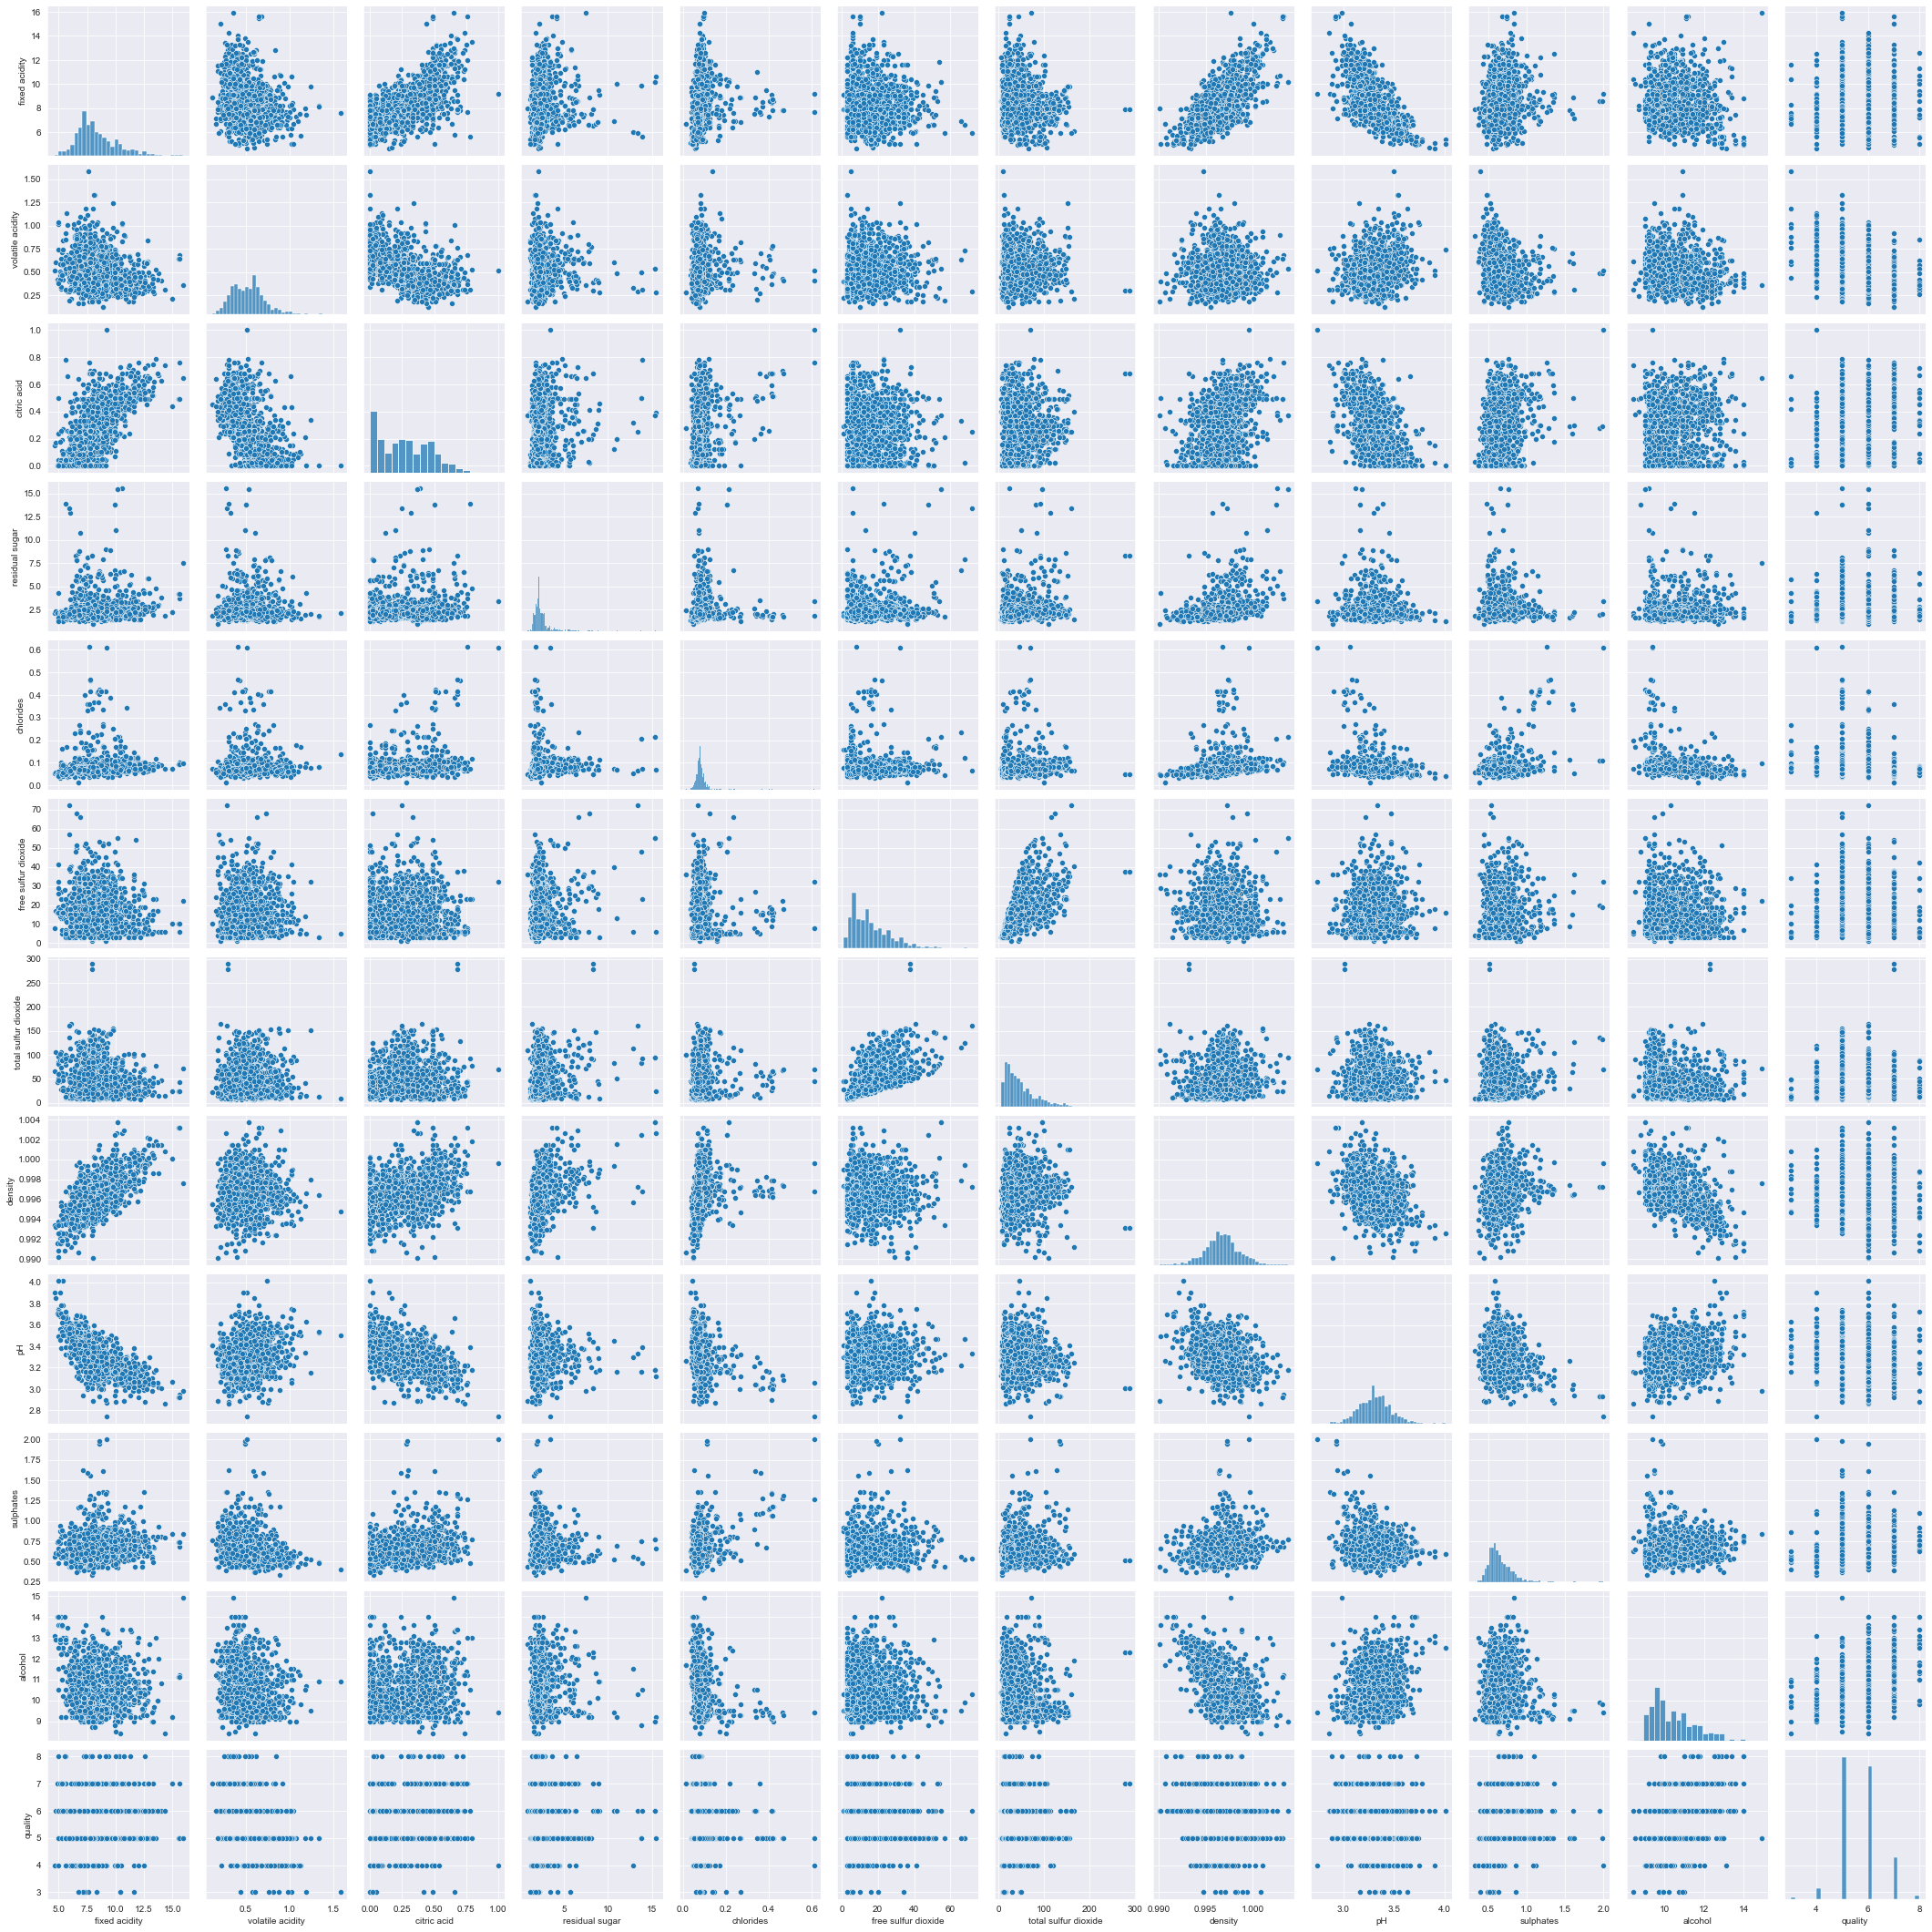

In [22]:
sns.pairplot(data)

# Removing the outliers

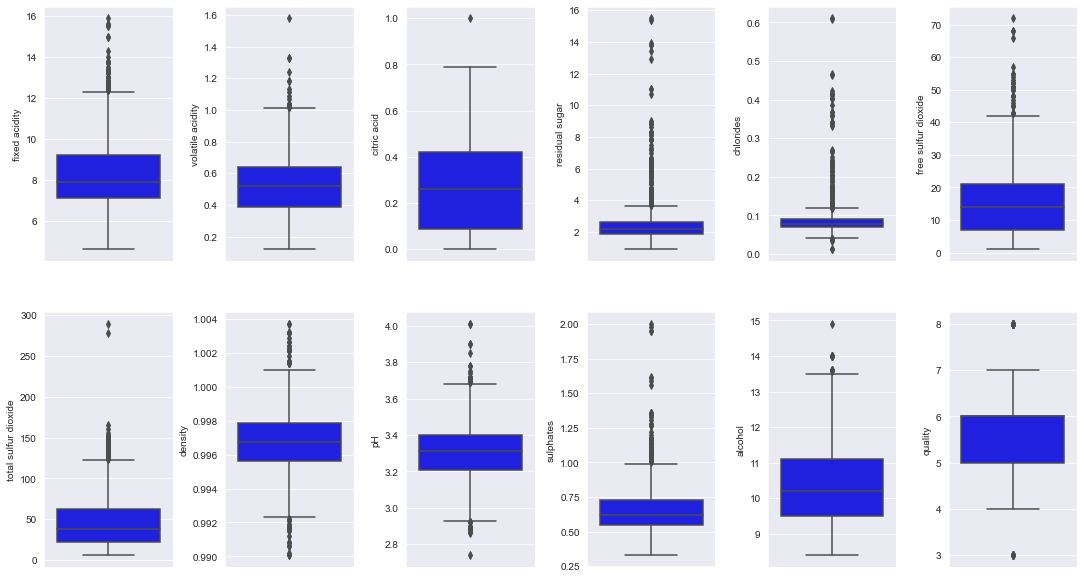

In [24]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15, 8))
index = 0
ax = ax.flatten()

for col, value in data.items():
    sns.boxplot(y=col, data=data, color='b', ax=ax[index])
    index += 1
    
plt.tight_layout(pad=0.5, w_pad = 0.7, h_pad =5.0)

In [25]:
def remove_outliers(data):
    data1 = data.copy()
    data = data._get_numeric_data()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    
    iqr = q3 - q1
    
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    for col in data.columns:
        for i in range(0, len(data[col])):
            if data[col][i] < lower_bound[col]:
                data[col][i] = lower_bound[col]
            
            if data[col][i] > upper_bound[col]:
                data[col][i] = upper_bound[col]
                
    for col in data.columns:
        data1[col] = data[col]
        
    return (data1)

data = remove_outliers(data)

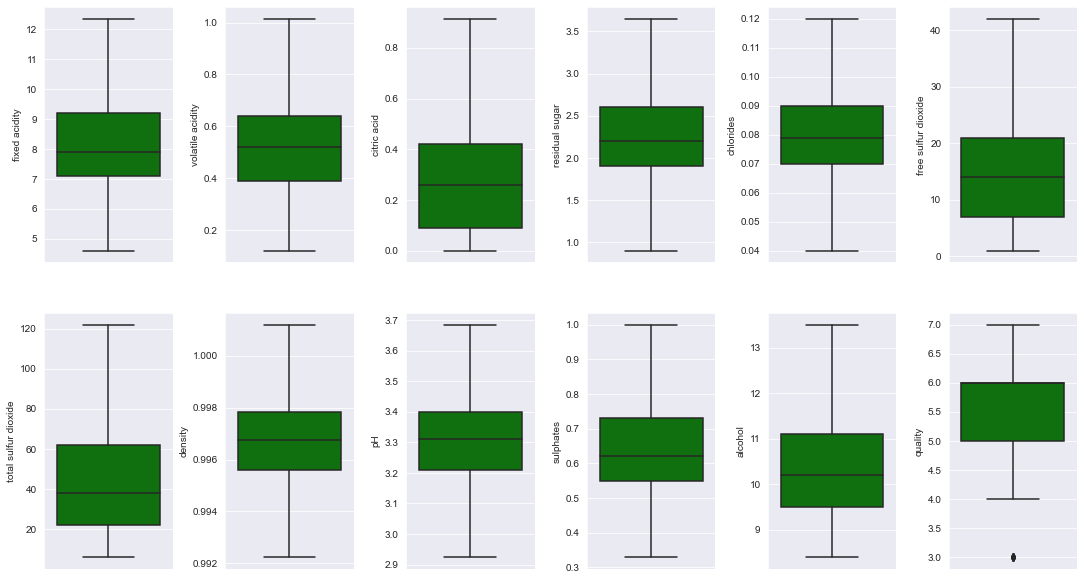

In [26]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15, 8))
index = 0
ax = ax.flatten()

for col, value in data.items():
    sns.boxplot(y=col, data=data, color='g', ax=ax[index])
    index += 1
    
plt.tight_layout(pad=0.5, w_pad = 0.7, h_pad =5.0)

# Splitting the dataset and making prediction

In [27]:
X = data.drop('quality', axis=1)
y = data.quality
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr.coef_

array([ 5.43322829e-02, -1.10161715e+00, -4.12912322e-01,  6.57488100e-02,
       -2.21540129e+00,  4.46398900e-03, -3.13919935e-03, -4.09608985e+01,
       -1.79285512e-01,  1.17238991e+00,  2.52712987e-01])

In [28]:
lr.intercept_

43.99000161735136

In [29]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_pred, y_test)))
print('R squared:', lr.score(X_test, y_test))

MAE: 0.5011883038323769
MSE: 0.3849482274647418
RMSE: 0.6204419613990835
R squared: 0.3454218118168456
